In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
file = 'Movies.csv'

movies_df = pd.read_csv(file)
movies_df.dropna(subset=['IMDb', 'Runtime'])
# movies_df
# movies_df[['Netflix', 'Hulu', 'Prime Video','Disney+']].sum()
# movies_df['Country'].value_counts()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16734,16734,16735,Sultan And The Rock Star,1980,NaN,5.9,NaN,0,0,0,1,0,Edward M. Abroms,"Adventure,Drama,Family",United States,English,60.0
16737,16737,16738,The Bears and I,1974,all,6.2,NaN,0,0,0,1,0,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,NaN,0,0,0,1,0,Dereck Joubert,"Adventure,Family",United States,English,72.0
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0


In [3]:
# movies_df[movies_df['Disney+'] == 1]
# movies_df[movies_df['Rotten Tomatoes'].notnull()].count()

Unnamed: 0         5158
ID                 5158
Title              5158
Year               5158
Age                3371
IMDb               5156
Rotten Tomatoes    5158
Netflix            5158
Hulu               5158
Prime Video        5158
Disney+            5158
Type               5158
Directors          5052
Genres             5153
Country            5139
Language           5111
Runtime            5122
dtype: int64

### Create DataFrame for top5 directors in movie counts

In [14]:
top5_dir = movies_df.groupby(['Directors']).count()[['Title']].sort_values(['Title'], ascending=False).head(5).reset_index()
top5_dir = top5_dir['Directors'].tolist()
top5_dir

['Jay Chapman', 'Joseph Kane', 'Cheh Chang', 'Jim Wynorski', 'Sam Newfield']

### Create DataFrame for movie list that belongs to the top 5 directors

In [17]:
top5_dir_movies = movies_df[movies_df['Directors'].isin(top5_dir)]
top5_dir_movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
1014,1014,1015,Jim Gaffigan: Obsessed,2014,16+,7.6,100%,1,0,0,0,0,Jay Chapman,"Documentary,Comedy",United States,English,60.0
1162,1162,1163,The Five Venoms,1978,18+,7.1,NaN,1,0,1,0,0,Cheh Chang,"Action,Drama,Mystery",Hong Kong,Mandarin,97.0
1234,1234,1235,Iliza Shlesinger: War Paint,2013,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,75.0
1417,1417,1418,Tom Segura: Completely Normal,2014,NaN,7.8,NaN,1,0,1,0,0,Jay Chapman,"Documentary,Comedy",United States,English,74.0
2211,2211,2212,Todd Barry: Spicy Honey,2017,NaN,6.7,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,60.0


In [18]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [191]:
movies_df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()

Netflix         3560
Hulu             903
Prime Video    12354
Disney+          564
dtype: int64

### Function to pull director data and plot linear regression

In [189]:


# Create a function to create perform linear regression
# Plot a regression line and the equation with the data.
def plot_linear_regression(director):
    
    
    print(f"Director: {director}")
    
    print('\n-----------------\n')
    movies = top5_dir_movies[top5_dir_movies['Directors'] == director]
#     movies = top5_dir_movies
    runtime = movies['Runtime'].tolist()
    ratings = movies['IMDb'].tolist()

    run_rate = movies[['Runtime', 'IMDb']].dropna()

    global y_values
    x_values = run_rate['Runtime'].dropna()
    y_values = run_rate['IMDb']

    global min_time, max_time
    max_time = movies['Runtime'].max()
    min_time = movies['Runtime'].min()

    global min_rating, max_rating
    min_rating = movies['IMDb'].min()
    max_rating = movies['IMDb'].max()

    print(f"min_time: {min_time}")
    print(f"max_time: {max_time}")
    print(f"min_rating: {min_rating}")
    print(f"max_rating: {max_rating}")
    print('\n-----------------------\n')
    print(movies['Runtime'].describe(),'\n\n', movies['IMDb'].describe())
#     print()
    
    
    print('\n')
    
    x_steps = round((round(max_time+0.5) - round(min_time))/10)
    print(f"x_steps: {x_steps}")

    y_steps = (round(max_rating+0.5) - round(min_rating))/10
    print(f"y_steps: {y_steps}")
        
#     coords = (min_time+1, min_rating+1)
    
#     print(coords)
    
    
    # Run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (min_time, min_rating), fontsize=15, color='red')
    plt.title(director)
    plt.xlabel('Runtime')
    plt.xticks(np.arange(round(min_time),round(max_time+0.5)+1, step=x_steps))
    plt.ylabel('Ratings')
    plt.yticks(np.arange(round(min_rating),round(max_rating+0.5)+0.1, step=y_steps))
    plt.show()
    
# Run Linear Regression



Director: Jay Chapman

-----------------

min_time: 46.0
max_time: 75.0
min_rating: 4.3
max_rating: 7.8

-----------------------

count    36.000000
mean     60.222222
std       6.719316
min      46.000000
25%      56.750000
50%      60.000000
75%      64.250000
max      75.000000
Name: Runtime, dtype: float64 

 count    36.000000
mean      6.472222
std       0.773346
min       4.300000
25%       5.975000
50%       6.650000
75%       6.925000
max       7.800000
Name: IMDb, dtype: float64


x_steps: 3
y_steps: 0.4
0.03971038488803177


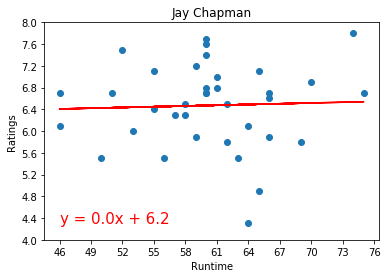

Director: Joseph Kane

-----------------

min_time: 53.0
max_time: 78.0
min_rating: 5.4
max_rating: 6.9

-----------------------

count    30.000000
mean     61.500000
std       5.934993
min      53.000000
25%      58.000000
50%      59.500000
75%      65.000000
max      78.000000
Name: Runtime, dtype: float64 

 count    30.000000
mean      6.240000
std       0.386496
min       5.400000
25%       5.925000
50%       6.250000
75%       6.400000
max       6.900000
Name: IMDb, dtype: float64


x_steps: 2
y_steps: 0.2
-0.14581705569279746


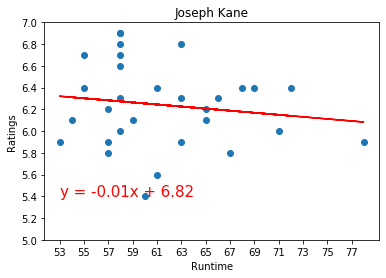

Director: Cheh Chang

-----------------

min_time: 83.0
max_time: 117.0
min_rating: 6.1
max_rating: 7.4

-----------------------

count     26.000000
mean     101.461538
std        8.247331
min       83.000000
25%       97.250000
50%      103.000000
75%      105.750000
max      117.000000
Name: Runtime, dtype: float64 

 count    26.000000
mean      6.757692
std       0.392095
min       6.100000
25%       6.500000
50%       6.700000
75%       7.075000
max       7.400000
Name: IMDb, dtype: float64


x_steps: 4
y_steps: 0.2
0.07183877579582773


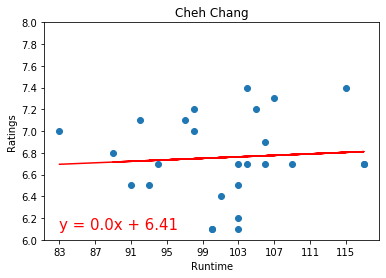

Director: Jim Wynorski

-----------------

min_time: 77.0
max_time: 97.0
min_rating: 2.4
max_rating: 5.6

-----------------------

count    22.000000
mean     86.363636
std       5.908392
min      77.000000
25%      82.250000
50%      85.000000
75%      91.500000
max      97.000000
Name: Runtime, dtype: float64 

 count    22.000000
mean      3.681818
std       1.043180
min       2.400000
25%       2.800000
50%       3.500000
75%       4.600000
max       5.600000
Name: IMDb, dtype: float64


x_steps: 2
y_steps: 0.4
-0.457025240891545


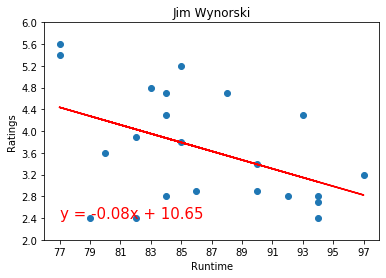

Director: Sam Newfield

-----------------

min_time: 56.0
max_time: 87.0
min_rating: 3.3
max_rating: 7.4

-----------------------

count    22.000000
mean     64.045455
std       8.126835
min      56.000000
25%      58.000000
50%      61.500000
75%      67.750000
max      87.000000
Name: Runtime, dtype: float64 

 count    22.000000
mean      5.468182
std       0.971198
min       3.300000
25%       5.050000
50%       5.600000
75%       6.175000
max       7.400000
Name: IMDb, dtype: float64


x_steps: 3
y_steps: 0.5
-0.4607485880838575


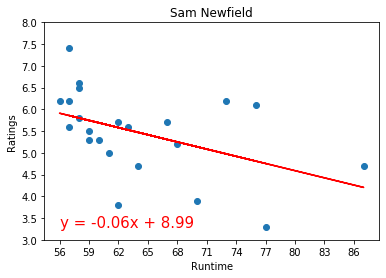

In [190]:
for director in top5_dir:
    plot_linear_regression(director)

Director: Jay Chapman

-----------------

min_time: 46.0
max_time: 75.0
min_rating: 4.3
max_rating: 7.8

-----------------------

count    36.000000
mean      6.472222
std       0.773346
min       4.300000
25%       5.975000
50%       6.650000
75%       6.925000
max       7.800000
Name: IMDb, dtype: float64


x_steps: 3
y_steps: 0.4
(47.0, 5.3)
0.03971038488803177


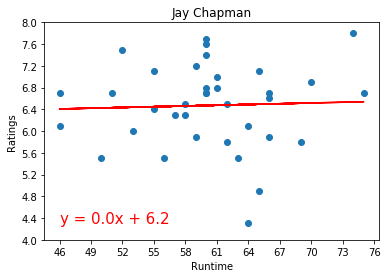

In [181]:
plot_linear_regression(top5_dir[0])